<a href="https://colab.research.google.com/github/kritinkesavkts/Deeplearningclass/blob/main/HW2_The_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-19 03:57:38--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-19 03:57:38 (345 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-19 03:57:38--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-19 03:57:38 (164 MB/s) - ‘train.dat’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    product=0
    for i in range(len(array1)):
      product=product+array1[i]*array2[i]
    return product


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x

    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    in_value = dot_product(weights, instance)
    output = sigmoid(in_value)
    return output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    result=0
    if output(weights,instance)>= 0.5:
      result=1
    return result


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




We are intended to train so we need not predict the ouputs directly or the values we only need the sigmoid value to have predict function seems to be a function that directly computes the output of the perceptron without applying an activation function.For better results in general perceptron we use the actication function based value generally.  

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



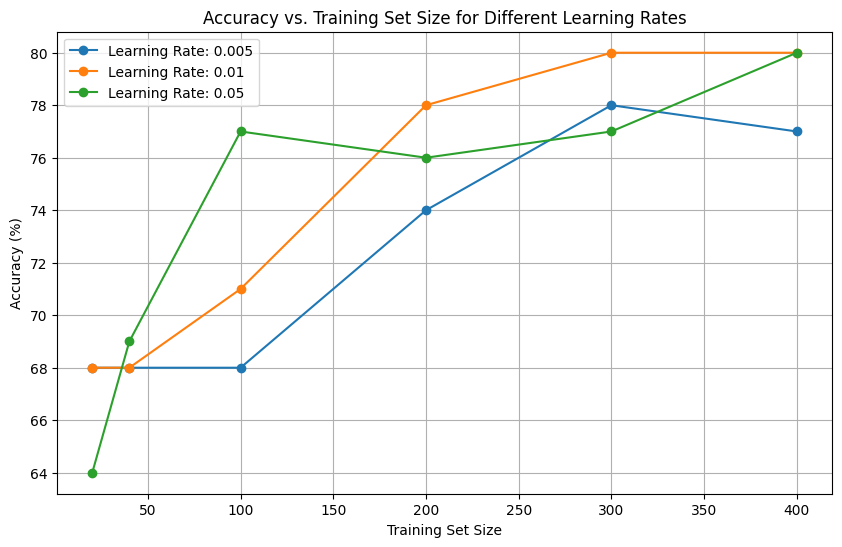

In [6]:
import matplotlib.pyplot as plt

# Provided results
results = {
    0.005: {
        20: 68.0,
        40: 68.0,
        100: 68.0,
        200: 74.0,
        300: 78.0,
        400: 77.0
    },
    0.01: {
        20: 68.0,
        40: 68.0,
        100: 71.0,
        200: 78.0,
        300: 80.0,
        400: 80.0
    },
    0.05: {
        20: 64.0,
        40: 69.0,
        100: 77.0,
        200: 76.0,
        300: 77.0,
        400: 80.0
    }
}

# Plotting the results
plt.figure(figsize=(10, 6))

for lr, acc_dict in results.items():
    tr_sizes = list(acc_dict.keys())
    accuracies = list(acc_dict.values())
    plt.plot(tr_sizes, accuracies, marker='o', label=f'Learning Rate: {lr}')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training Set Size for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


A)Based on the provided results, we can observe several interesting trends. First, the effect of training set size on test accuracy, it's clear that increasing the size of the training set generally will be leading to improved accuracy on the test dataset.With a fixed number of epochs (100) and learning rate (0.005), we see that as the training set size increases from 20 to 400, the accuracy on the test dataset rises from 68.0% to 77.0%. This trend suggests that more training data allows the perceptron to learn better representations.
But not necessarily as we dicuss it in b part where accuracy falls down while more training.

B)Considering the observation that worse accuracy is achieved in the second run despite more training data, this scenario could arise for several reasons. One possibility is that the additional training data introduced noise or inconsistencies that negatively affected perception and generalization. Although the second experiment used more training data, other hyperparameters such as learning and number of epochs remained constant, which may not be optimal for the increased dataset.

C)Might be there is a chance by having or making changes accordingly to the learning rate in a hyperparameter tuning with little changes which yield higher accuracy and it seeems it is nearer to 0.01 the learning rate with 80 percent.

d)It all depends on the situations and how it is being trained it might be possible that we can yield with good results.additional epochs may not significantly enhance accuracy. It's essential to have the validation performance to determine the optimal number of epochs to prevent overfitting and achieve best generalization performance.